# 負の二項分布

## 概要

**負の二項分布**（negative binomial distribution）は、独立なベルヌーイ試行において$r$回目の成功が起こるまでの失敗回数の分布である。幾何分布の一般化であり、$r=1$のとき幾何分布に一致する。

ポアソン分布では期待値と分散が等しいという制約があるが、負の二項分布はこの制約がなく**過分散（overdispersion）**を扱えるため、カウントデータの分析において重要な代替モデルとなる。

## 確率質量関数

$$
P(X=k \mid r, p) = \binom{k+r-1}{k} p^r (1-p)^k, \quad k=0,1,2,\dots
$$

- $r > 0$: 成功回数（自然数。一般化する場合は正の実数）
- $p$: 各試行での成功確率 ($0 < p \leq 1$)

$r$が正の実数の場合、二項係数は次のように一般化される：

$$
\binom{k+r-1}{k} = \frac{\Gamma(k+r)}{k!\,\Gamma(r)}
$$

## 累積分布関数

$$
F(k) = P(X \leq k) = I_p(r, k+1)
$$

ここで$I_p$は正則化不完全ベータ関数である。

## 期待値・分散

$$
E[X] = \frac{r(1-p)}{p}
$$

$$
V[X] = \frac{r(1-p)}{p^2}
$$

分散は次のように書き直すことができる：

$$
V[X] = E[X] + \frac{(E[X])^2}{r}
$$

すなわち$V[X] > E[X]$が常に成り立ち、ポアソン分布（$V[X]=E[X]$）に比べて過分散となる。$r \to \infty$のとき第2項が消え、ポアソン分布に近づく。

## 図

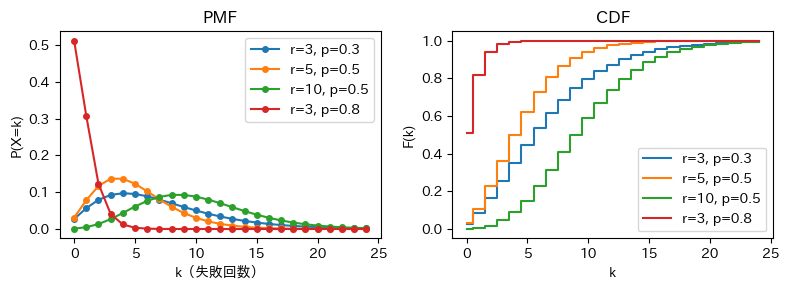

In [2]:
import matplotlib.pyplot as plt
import matplotlib_fontja
import numpy as np
from scipy.stats import nbinom

fig, axes = plt.subplots(1, 2, figsize=[8, 3])

params = [(3, 0.3), (5, 0.5), (10, 0.5), (3, 0.8)]
for r, p in params:
    k = np.arange(0, 25)
    pmf = nbinom.pmf(k, n=r, p=p)
    axes[0].plot(k, pmf, 'o-', markersize=4, label=f"r={r}, p={p}")

    cdf = nbinom.cdf(k, n=r, p=p)
    axes[1].step(k, cdf, where='mid', label=f"r={r}, p={p}")

axes[0].set(title="PMF", xlabel=r"k（失敗回数）", ylabel="P(X=k)")
axes[0].legend()
axes[1].set(title="CDF", xlabel="k", ylabel="F(k)")
axes[1].legend()
fig.tight_layout()

## 性質

- $r=1$のとき**幾何分布**に一致する
- **再生性**: $X_1 \sim \text{NB}(r_1, p), X_2 \sim \text{NB}(r_2, p)$が独立なら$X_1 + X_2 \sim \text{NB}(r_1+r_2, p)$
- **ポアソン-ガンマ混合モデル**: $X \mid \lambda \sim \text{Poi}(\lambda)$で$\lambda \sim \text{Gamma}(r, (1-p)/p)$のとき、$X$の周辺分布は$\text{NB}(r, p)$となる。この解釈により、負の二項分布は「発生率に個体差があるポアソン過程」とみなせる
- $r \to \infty$で$r(1-p)/p = \mu$を一定に保つとポアソン分布$\text{Poi}(\mu)$に収束する

## 応用例

- 過分散のあるカウントデータの分析（ポアソン回帰の代替としての負の二項回帰）
- 生態学における個体数のモデリング
- RNA-seqデータにおける遺伝子発現量の分析（DESeq2等で使用）
- 保険数理における事故件数のモデリング